In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
# importing modules

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# reading the csv file

In [5]:
os.chdir('C:/Users/Ayanava Debnath/OneDrive/Desktop/study/Datasets')

In [7]:
df = pd.read_csv('fatalities_isr_pse_conflict_2000_to_2023.csv')

In [8]:
df.head()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


In [9]:
# getting overview of all columns

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11124 non-null  object 
 1   date_of_event                 11124 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11124 non-null  object 
 4   event_location                11124 non-null  object 
 5   event_location_district       11124 non-null  object 
 6   event_location_region         11124 non-null  object 
 7   date_of_death                 11124 non-null  object 
 8   gender                        11104 non-null  object 
 9   took_part_in_the_hostilities  9694 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10833 non-null  object 
 13  a

In [11]:
# checking the dimensions

In [12]:
df.shape

(11124, 16)

In [13]:
# separating categorical and continuous values

In [16]:
cat = list(df.columns[df.dtypes=='object'])
cat

['name',
 'date_of_event',
 'citizenship',
 'event_location',
 'event_location_district',
 'event_location_region',
 'date_of_death',
 'gender',
 'took_part_in_the_hostilities',
 'place_of_residence',
 'place_of_residence_district',
 'type_of_injury',
 'ammunition',
 'killed_by',
 'notes']

In [17]:
con=list(df.columns[df.dtypes!='object'])
con

['age']

In [18]:
# changing data type of 'date_of_event','date_of_death' to Pandas datetime

In [19]:
df['date_of_event']=pd.to_datetime(df['date_of_event'])
df['date_of_death']=pd.to_datetime(df['date_of_death'])

In [20]:
df[['date_of_death','date_of_event']].dtypes

date_of_death    datetime64[ns]
date_of_event    datetime64[ns]
dtype: object

In [21]:
# checking missing values

In [22]:
df.isna().sum()

name                               0
date_of_event                      0
age                              129
citizenship                        0
event_location                     0
event_location_district            0
event_location_region              0
date_of_death                      0
gender                            20
took_part_in_the_hostilities    1430
place_of_residence                68
place_of_residence_district       68
type_of_injury                   291
ammunition                      5253
killed_by                          0
notes                            280
dtype: int64

In [23]:
# filling categorical missing values with mode                    
# and continuous missing values with median

In [31]:
for i in df.columns:
    if i in cat :
        md = df[i].mode()[0]
        df[i]=df[i].fillna(md)
    else:
        mn = df[i].mean()
        df[i]=df[i].fillna(mn)

In [32]:
df.isna().sum()

name                            0
date_of_event                   0
age                             0
citizenship                     0
event_location                  0
event_location_district         0
event_location_region           0
date_of_death                   0
gender                          0
took_part_in_the_hostilities    0
place_of_residence              0
place_of_residence_district     0
type_of_injury                  0
ammunition                      0
killed_by                       0
notes                           0
dtype: int64

In [33]:
# checking duplicate values 

In [36]:
df.duplicated().sum()

7

In [37]:
# dropping duplicate columns

In [38]:
df.drop_duplicates(inplace = True)

In [39]:
df.duplicated().sum()

0

In [41]:
# dropping the notes column as that is not important 

In [43]:
df.drop(columns = 'notes',inplace = True)

In [44]:
df.head()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,No,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,No,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,No,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,No,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,No,Jenin,Jenin,gunfire,live ammunition,Israeli security forces


In [49]:
df['type_of_injury'].value_counts()

gunfire                         10133
explosion                         555
shelling                          311
stabbing                           48
house demolition                   25
hit by a vehicle                   18
beating                             9
stones throwing                     6
being bludgeoned with an axe        4
fire                                4
physically assaulted                2
physical assault                    1
Strangulation                       1
Name: type_of_injury, dtype: int64

## Age distribution of fatalities

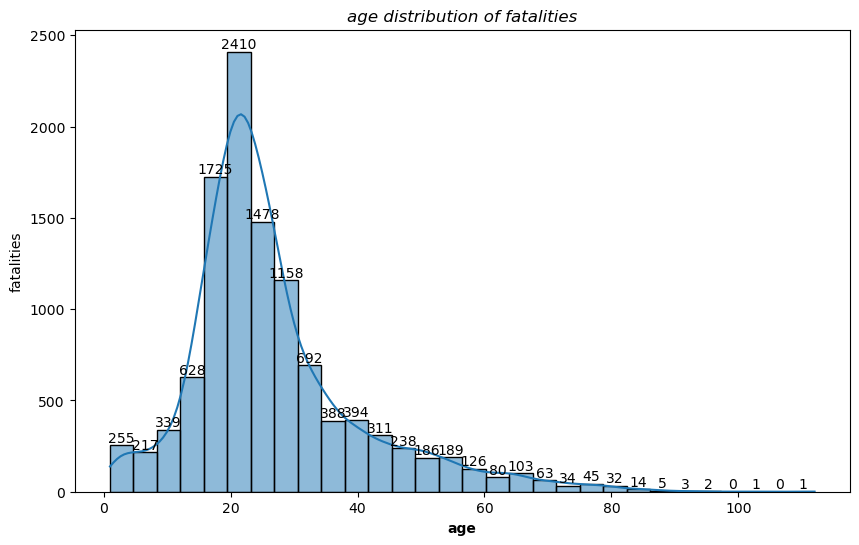

In [99]:
ax =sns.histplot(data=df,x = 'age',kde=True,bins=30)
plt.rcParams["figure.figsize"] = (15,8)
for i in ax.containers:
    ax.bar_label(i)
plt.ylabel('fatalities')
plt.xlabel('age',weight='bold')
plt.title('age distribution of fatalities',style='italic')
plt.show()


1. most fatalities are occured in late teens to mid twenties(19-25)
2. as the age increases the fatality count decreases i.e. less fatalities among old people

## Gender distribution of fatalities 

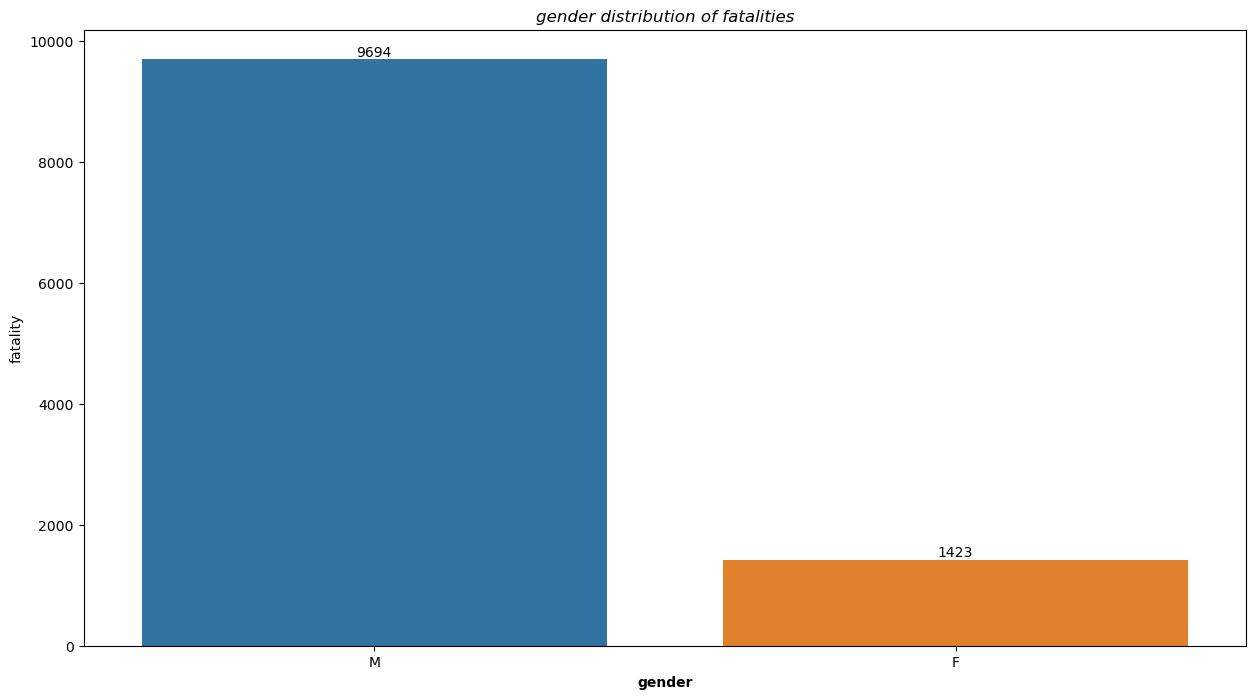

In [98]:
ax = sns.countplot(data=df,x = 'gender')
plt.rcParams['figure.figsize']=(10,6)
plt.ylabel('fatality')
plt.xlabel('gender',weight='bold')
plt.title('gender distribution of fatalities',style='italic')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

1. the fatality of men is much higher than women

## Fatality by region

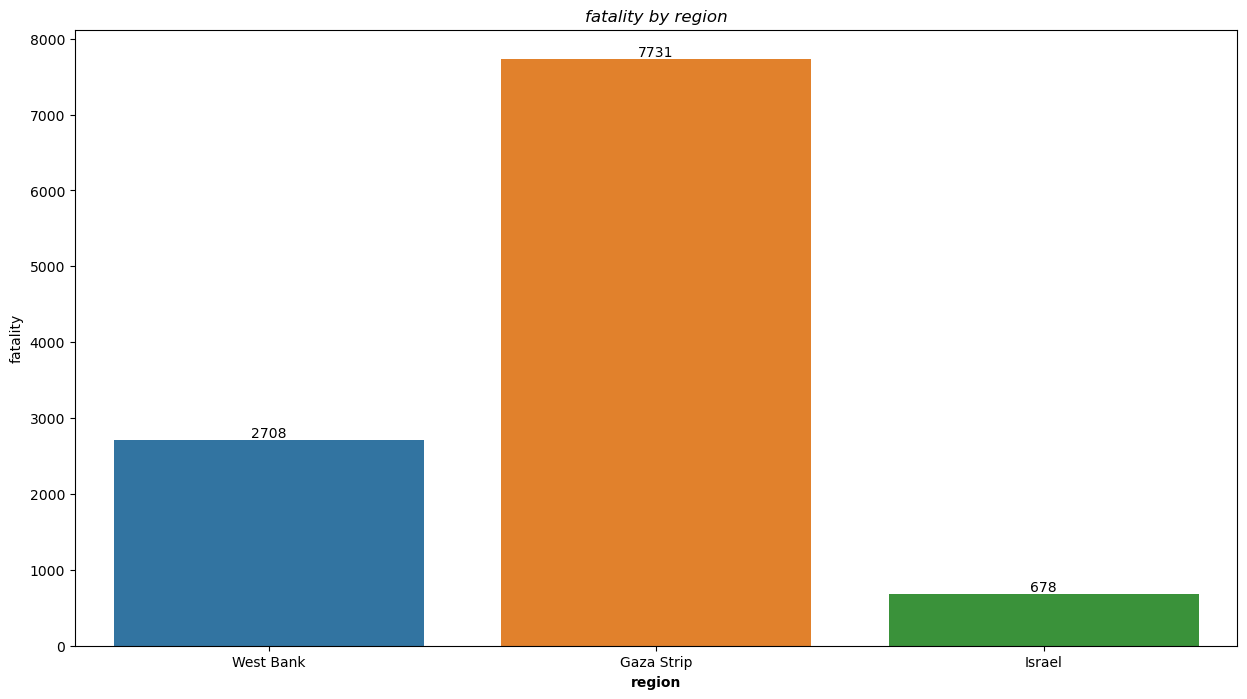

In [118]:
ax = sns.countplot(data=df,x='event_location_region')
plt.xlabel('region',weight='bold')
plt.ylabel('fatality')
plt.title('fatality by region',style='italic')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

## Fatality of district

Text(0.5, 1.0, 'fatality of district')

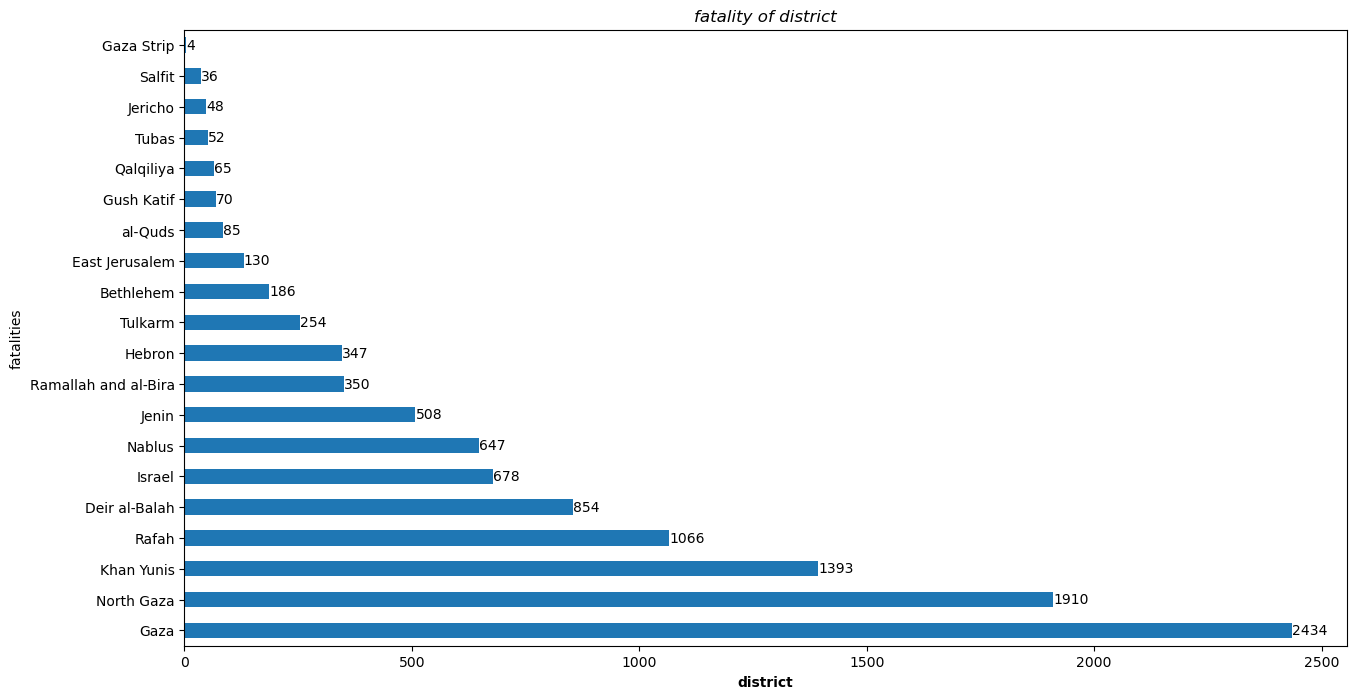

In [122]:
ax = df['event_location_district'].value_counts().plot(kind='barh')
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('district',weight='bold')
plt.ylabel('fatalities')
plt.title('fatality of district',style='italic')

1. most fatalities are occured in Gaza followed by North Gaza,Khan Yunis,Rafah


## Fatality by citizenship

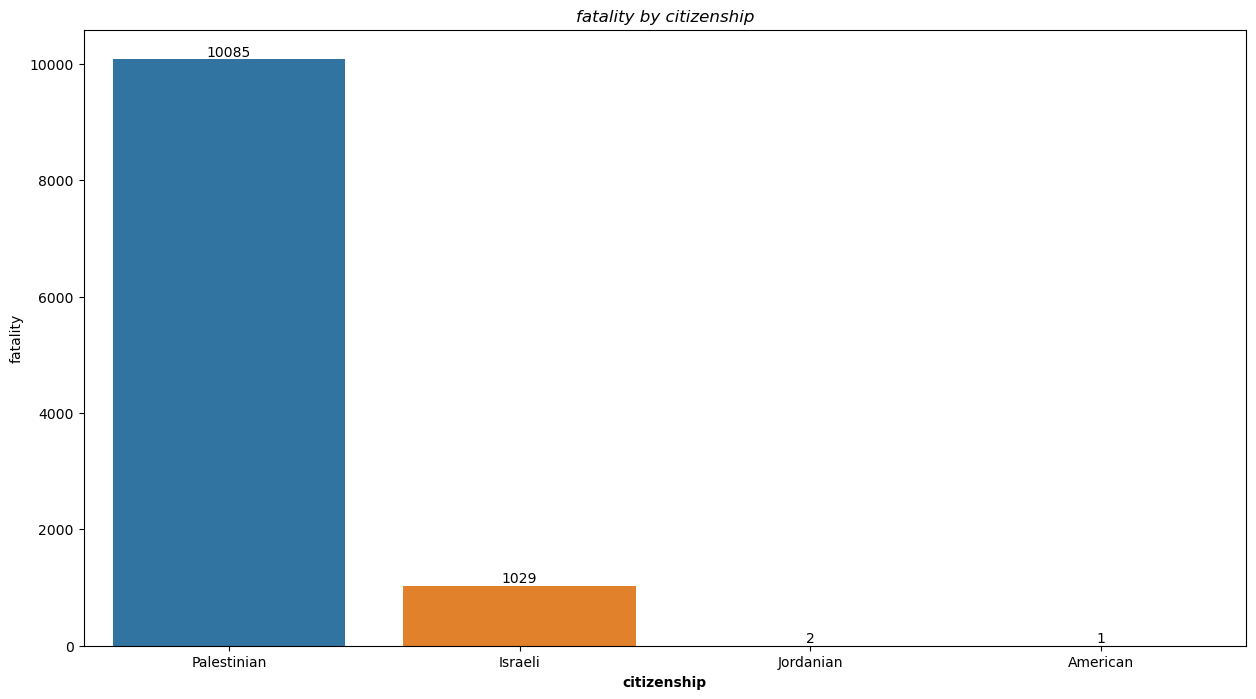

In [121]:
ax = sns.countplot(data=df , x = 'citizenship')
plt.xlabel('citizenship',weight='bold')
plt.ylabel('fatality')
plt.title('fatality by citizenship',style='italic')
for i in ax.containers:
    ax.bar_label(i)
plt.show()


1. Palestinians are mostly died in the conflict

## Distribution Segregated by Participation in Hostile Activities

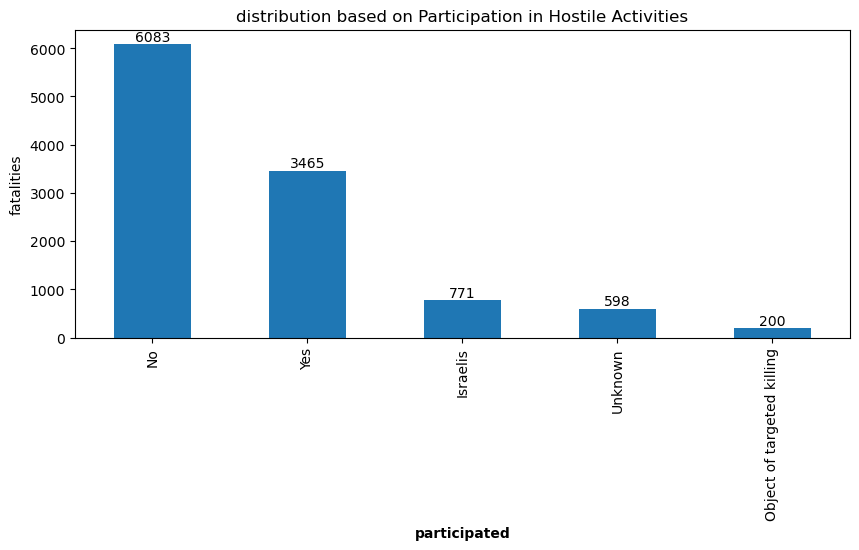

In [127]:
ax =df['took_part_in_the_hostilities'].value_counts().plot(kind='bar')
plt.rcParams['figure.figsize']=(10,4)
plt.xlabel('participated',weight='bold')
plt.ylabel('fatalities')
plt.title('distribution based on Participation in Hostile Activities')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

1. A significant number of fatalities involved individuals who did not take part in the hostilities.

## Distribution based on type of injuries

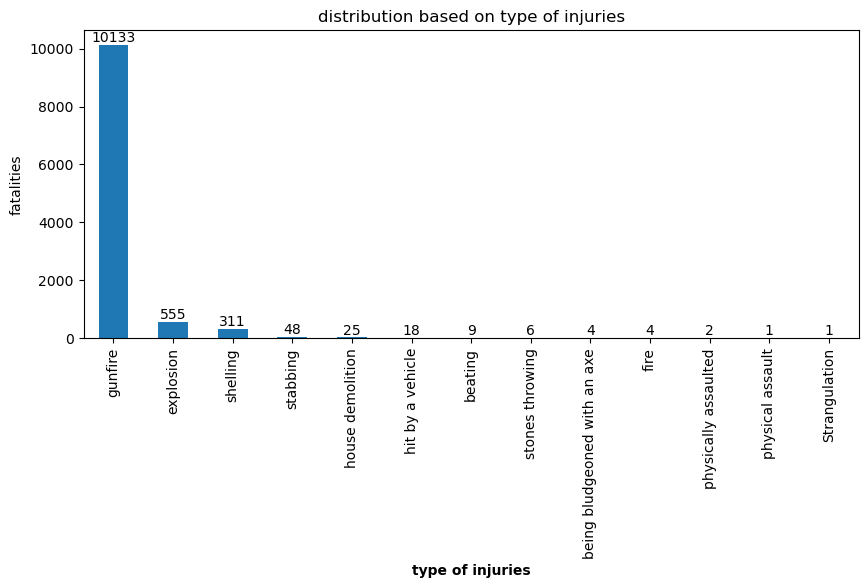

In [131]:
ax = df['type_of_injury'].value_counts().plot(kind='bar')
plt.xlabel('type of injuries',weight='bold')
plt.ylabel('fatalities')
plt.title('distribution based on type of injuries')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

1. Most people got injured by gunfire followed by explosion and shelling

   ##  Distribution of Parties Liable for Fatalities

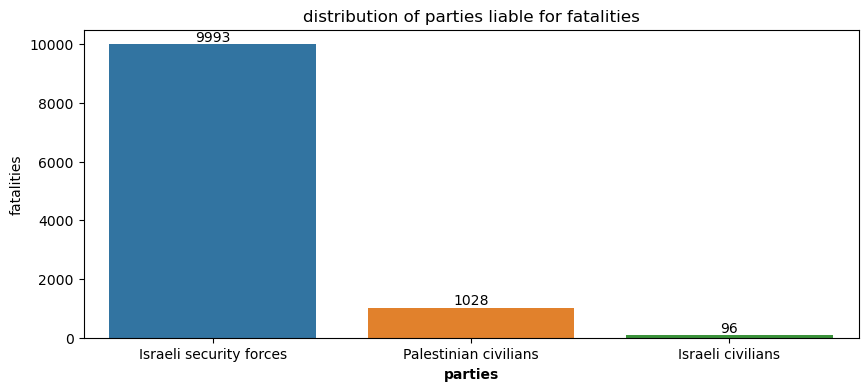

In [134]:
ax =sns.countplot(data=df,x='killed_by')
plt.xlabel('parties',weight='bold')
plt.ylabel('fatalities')
plt.title('distribution of parties liable for fatalities')
for i in ax.containers:
    ax.bar_label(i)
plt.show()


1. Israeli security forces are responsible for majority of the fatalities
2. Palestine civilians and Israeli civilians are also involved but their number is comparatively lower

## Distribution Based on Type of Ammunition Used

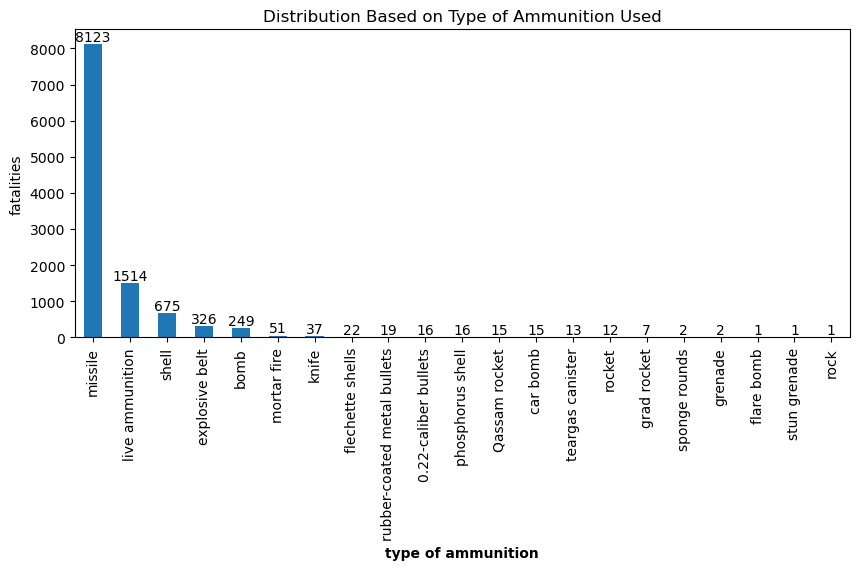

In [137]:
ax = df['ammunition'].value_counts().plot(kind='bar')
plt.xlabel('type of ammunition',weight='bold')
plt.ylabel('fatalities')
plt.title('Distribution Based on Type of Ammunition Used')
for i in ax.containers:
    ax.bar_label(i)
plt.show()


1. most fatalities occured because of missiles followed by live ammunition 

## Top 10 Common Places of Residence Among Victims

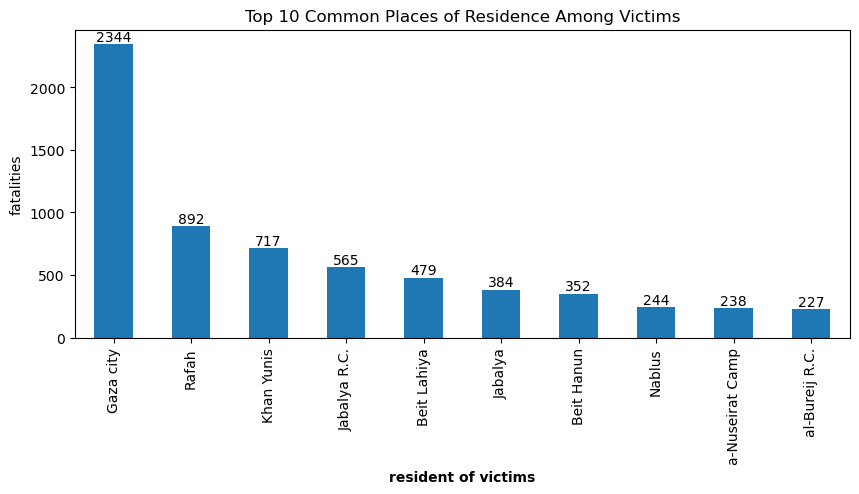

In [142]:
ax = df['place_of_residence'].value_counts().head(10).plot(kind='bar')
plt.xlabel('resident of victims',weight='bold')
plt.ylabel('fatalities')
plt.title('Top 10 Common Places of Residence Among Victims')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

1. most people who died are from Gaza city followed by Rafah and Khan Yunis
2. The list provides a snapshot of areas that have been notably affected based on the residence of the victims.

## Fatality trends from 2000 to 2023

In [196]:
fby = df.groupby(df['date_of_event'].dt.year).count()['date_of_event'].reset_index(name='fatalities')
fby

,date_of_event,fatalities
0,2000,35
1,2001,350
2,2002,1322
3,2003,732
4,2004,928
5,2005,234
6,2006,684
7,2007,395
8,2008,915
9,2009,1045


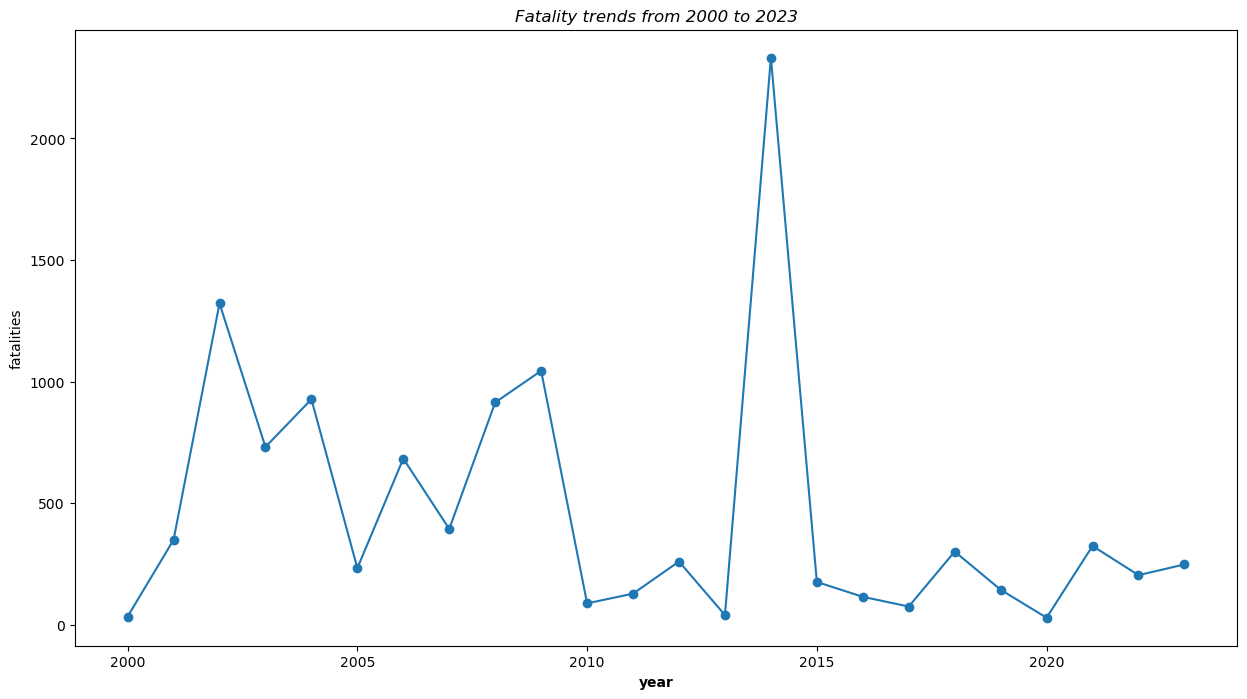

In [204]:
ax = plt.plot(fby['date_of_event'],fby['fatalities'],marker='o')
plt.rcParams['figure.figsize']=(15,8)
plt.xlabel('year',weight='bold')
plt.ylabel('fatalities')
plt.title('Fatality trends from 2000 to 2023',style='italic')
plt.show()

1. fatalities have been skyrocketed in 2014 then it decreased
2. fatalities spiked significantly around 2002 and it went down later
3. from year 2010 to 2013 fatalities were kind of stable 